## Data Analysis...

This code block is designed to manage GPU memory usage in TensorFlow. It lists the available physical GPUs, sets a memory limit for each GPU to avoid OOM errors, and optionally enables memory growth. It then lists the logical GPUs and prints the number of physical and logical GPUs. If any errors occur during this process, they are caught and printed.

In [2]:
import tensorflow as tf
import warnings

# Avoid OOM errors by setting GPU Memory Growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.set_logical_device_configuration(
                gpu,
                [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])  # Example: Limit to 1GB
            #tf.config.experimental.set_memory_growth(gpu, True)  # Enable memory growth
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
    except RuntimeError as e:
        print(e)
print(f"\n {gpus}")



2025-02-03 20:05:52.634307: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1 Physical GPUs, 1 Logical GPUs

 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1738593390.904137    7085 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1024 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:06:00.0, compute capability: 6.1


#### Python Libraries ...

Improt other python libraries to the code.

In [1]:
import pandas as pd
import numpy as np

#### Load CSV ...

In [2]:
df = pd.read_csv(r'/home/malaka/Projects/CV_Projects/Crime_Data_Analysis_of_LAPD/Data_sets/Ready_dataset.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Temperature (°C),Dew point (°C),Humidity (%),Precipitation (mm),Wind Direction(degrees°),Windspeed (km/h),Air pressure (hPa),Sunshine total(min),Wind Gust (km/h),Snow depth(mm)
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,15.85,3.600000,44.00,0.000000,245.000000,9.4,1013.700000,NaN,NaN,NaN
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,17.20,9.400000,60.00,0.000000,0.000000,0.0,1017.200000,NaN,NaN,NaN
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,21.70,11.700000,53.00,0.000000,0.000000,0.0,1018.700000,NaN,NaN,NaN
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,18.53,15.078333,80.55,0.461667,103.833333,7.6,1015.521667,NaN,NaN,NaN
4,200412582,2020-09-09,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,22.20,17.800000,76.00,0.000000,0.000000,0.0,1006.350000,NaN,NaN,NaN


#### Drop NaN columns ...

In this step, we will remove the columns 
1. 'Sunshine total(min)', 
2. 'Wind Gust (km/h)', 
3. 'Snow depth(mm)' ,
from the dataframe. 

These columns are not required for our analysis and because those are containes NaN values, dropping them will help in reducing the complexity of the dataset.

In [3]:
df = df.drop(['Sunshine total(min)', 'Wind Gust (km/h)', 'Snow depth(mm)'], axis=1)
df.sample(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Year,Month,Date/Time,Temperature (°C),Dew point (°C),Humidity (%),Precipitation (mm),Wind Direction(degrees°),Windspeed (km/h),Air pressure (hPa)
235103,211504135,2020-01-04,2020-01-04,10:45,15,N Hollywood,1553,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,2020,1,2020-01-04 10:45:00,11.100000,6.150000,71.750000,0.0,0.0,0.00,1025.80
661529,232106125,2023-02-26,2023-02-25,21:30,21,Topanga,2156,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,2023,2,2023-02-25 21:30:00,7.250000,5.600000,89.500000,2.2,130.0,2.70,1014.00
609656,222105637,2022-02-15,2022-02-15,00:04,21,Topanga,2145,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,2022,2,2022-02-15 00:04:00,16.866667,10.866667,67.933333,0.0,239.2,7.52,1014.00
637869,231516573,2023-10-25,2023-10-19,05:24,15,N Hollywood,1591,2,903,CONTEMPT OF COURT,...,2023,10,2023-10-19 05:24:00,18.120000,16.980000,93.000000,0.0,209.4,3.24,1013.88
713673,231220384,2023-09-28,2023-09-27,17:30,12,77th Street,1203,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,2023,9,2023-09-27 17:30:00,25.000000,14.200000,51.000000,0.0,0.0,0.00,1012.65


In [4]:
# Example: Rainy days (assuming a certain threshold of precipitation)
df['Rainy Day'] = df['Precipitation (mm)'].apply(lambda x: 1 if x > 0 else 0)
df["Rainy Day"]


0         0
1         0
2         0
3         1
4         0
         ..
989324    0
989325    0
989326    0
989327    0
989328    0
Name: Rainy Day, Length: 989329, dtype: int64

In [5]:
df.sample(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Month,Date/Time,Temperature (°C),Dew point (°C),Humidity (%),Precipitation (mm),Wind Direction(degrees°),Windspeed (km/h),Air pressure (hPa),Rainy Day
436140,220111129,2022-04-26,2022-04-24,21:00,1,Central,144,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,4,2022-04-24 21:00:00,28.00,-2.00,14.0,0.0,260.0,11.0,1015.00,0
681169,231420120,2023-11-11,2023-11-10,21:30,14,Pacific,1411,1,320,"BURGLARY, ATTEMPTED",...,11,2023-11-10 21:30:00,23.85,-1.15,19.0,0.0,130.0,2.7,1015.25,0
739958,230415207,2023-12-09,2023-12-08,14:30,4,Hollenbeck,477,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,12,2023-12-08 14:30:00,11.95,6.20,68.0,0.0,0.0,0.0,1018.05,0
458330,221307616,2022-03-08,2022-03-08,20:48,13,Newton,1371,1,210,ROBBERY,...,3,2022-03-08 20:48:00,19.20,-8.04,15.0,0.0,236.0,6.2,1018.20,0
814941,230705435,2023-02-01,2023-02-01,13:06,7,Wilshire,736,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,2,2023-02-01 13:06:00,5.00,-1.86,61.3,0.0,3.2,1.4,1020.10,0


In [6]:
column_names = df.columns.tolist()

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989329 entries, 0 to 989328
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DR_NO                     989329 non-null  int64  
 1   Date Rptd                 989329 non-null  object 
 2   DATE OCC                  989329 non-null  object 
 3   TIME OCC                  989329 non-null  object 
 4   AREA                      989329 non-null  int64  
 5   AREA NAME                 989329 non-null  object 
 6   Rpt Dist No               989329 non-null  int64  
 7   Part 1-2                  989329 non-null  int64  
 8   Crm Cd                    989329 non-null  int64  
 9   Crm Cd Desc               989329 non-null  object 
 10  Mocodes                   840950 non-null  object 
 11  Vict Age                  989329 non-null  int64  
 12  Vict Sex                  989329 non-null  float64
 13  Vict Descent              847756 non-null  o

In [9]:
df['Premis Desc']

0                                               STREET
1                    BUS STOP/LAYOVER (ALSO QUERY 124)
2         MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
3                                       CLOTHING STORE
4                                               STREET
                              ...                     
989324                              VIDEO RENTAL STORE
989325                                          STREET
989326                                           HOTEL
989327                            RESTAURANT/FAST FOOD
989328                                        SIDEWALK
Name: Premis Desc, Length: 989329, dtype: object

## All the colums...

| No  | Column                    | Non-Null Count         | Dtype   |
| --- | -------------------------- | ---------------------- | ------- |
| 0   | DR_NO                      | 989329 non-null        | int64   |
| 1   | Date Rptd                  | 989329 non-null        | object  |
| 2   | DATE OCC                   | 989329 non-null        | object  |
| 3   | TIME OCC                   | 989329 non-null        | object  |
| 4   | AREA                       | 989329 non-null        | int64   |
| 5   | AREA NAME                  | 989329 non-null        | object  |
| 6   | Rpt Dist No                | 989329 non-null        | int64   |
| 7   | Part 1-2                   | 989329 non-null        | int64   |
| 8   | Crm Cd                     | 989329 non-null        | int64   |
| 9   | Crm Cd Desc                | 989329 non-null        | object  |
| 10  | Mocodes                    | 840950 non-null        | object  |
| 11  | Vict Age                   | 989329 non-null        | int64   |
| 12  | Vict Sex                   | 989329 non-null        | float64 |
| 13  | Vict Descent               | 847756 non-null        | object  |
| 14  | Premis Cd                  | 989313 non-null        | float64 |
| 15  | Premis Desc                | 988761 non-null        | object  |
| 16  | Weapon Used Cd             | 324301 non-null        | float64 |
| 17  | Weapon Desc                | 324301 non-null        | object  |
| 18  | Status                     | 989328 non-null        | object  |
| 19  | Status Desc                | 989329 non-null        | object  |
| 20  | Crm Cd 1                   | 989318 non-null        | float64 |
| 21  | Crm Cd 2                   | 68823 non-null         | float64 |
| 22  | Crm Cd 3                   | 2312 non-null          | float64 |
| 23  | Crm Cd 4                   | 61 non-null            | float64 |
| 24  | LOCATION                   | 989329 non-null        | object  |
| 25  | Cross Street               | 151168 non-null        | object  |
| 26  | LAT                        | 989329 non-null        | float64 |
| 27  | LON                        | 989329 non-null        | float64 |
| 28  | Year                       | 989329 non-null        | int64   |
| 29  | Month                      | 989329 non-null        | int64   |
| 30  | Date/Time                  | 989329 non-null        | object  |
| 31  | Temperature (°C)           | 989329 non-null        | float64 |
| 32  | Dew point (°C)             | 989329 non-null        | float64 |
| 33  | Humidity (%)               | 989329 non-null        | float64 |
| 34  | Precipitation (mm)         | 989329 non-null        | float64 |
| 35  | Wind Direction(degrees°)   | 989329 non-null        | float64 |
| 36  | Windspeed (km/h)           | 989329 non-null        | float64 |
| 37  | Air pressure (hPa)         | 989329 non-null        | float64 |
| 38  | Rainy Day                  | 989329 non-null        | int64   |


In [16]:
import pandas as pd
# import mysql.connector
import pymysql
from tqdm import tqdm  # Import tqdm for progress bar


In [12]:
# Connect to MySQL
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="MS@sltc",
    database="LAPD_Crime_Data",
    autocommit=True 
)
print("Sucessfully connect....")


Sucessfully connect....


In [13]:
# Check for duplicates in the primary key column
duplicates = df[df.duplicated(subset="DR_NO", keep=False)]
print("Duplicate rows:")
print(duplicates)


Duplicate rows:
            DR_NO   Date Rptd    DATE OCC TIME OCC  AREA   AREA NAME  \
77264   202007663  2020-03-17  2020-03-15    03:00    20     Olympic   
77497   201415240  2020-08-10  2020-08-09    22:00    14     Pacific   
78605   201611598  2020-08-01  2020-08-01    07:30    16    Foothill   
112507  201816639  2020-09-04  2020-08-29    01:00    18   Southeast   
112783  221315910  2020-10-29  2020-08-02    14:15    13      Newton   
...           ...         ...         ...      ...   ...         ...   
397931  202105842  2020-02-10  2020-02-07    11:20    21     Topanga   
397934  201421622  2020-12-14  2020-10-31    17:00    14     Pacific   
397936  201813651  2020-07-07  2020-07-07    20:09    18   Southeast   
397938  201708251  2020-04-16  2020-04-16    07:15    17  Devonshire   
397941  201711753  2020-08-01  2020-08-01    00:20    17  Devonshire   

        Rpt Dist No  Part 1-2  Crm Cd  \
77264          2034         1     510   
77497          1434         1     510

# Optimised for Batch Insertions


### Batch Size:
The batch_size variable (e.g., 1000) determines how many rows are inserted at once. You can adjust it based on your system's resources.


### Executemany:
Used to insert multiple rows in one query.


### Error Handling in Batches:
Each batch is wrapped in a try-except block to handle errors without halting the entire process.


### Prepared Data:
The rows are pre-processed into a list of tuples (rows = [tuple(row) for _, row in data.iterrows()]), which is compatible with executemany.



### Improved Connection Management:
conn.ping(reconnect=True) ensures the connection is active before each operation.


### Benefits of Batch Insertion:
- Speed: Reduces the number of queries sent to the database.
- Error Isolation: Errors are logged for specific batches rather than individual rows.
- Efficiency: Utilises database resources more effectively.


### Estimation for 1 Million Rows:
With a batch size of 1000, this approach will process approximately 1000 queries (1 million rows ÷ 1000 batch size). Depending on your system, this method should insert 1 million rows in 10–30 minutes.

In [18]:
cursor = conn.cursor()

# Insert data into the table
insert_query = """
INSERT INTO crime_data (
    DR_NO, Date_Rptd, DATE_OCC, TIME_OCC, AREA, AREA_NAME, Rpt_Dist_No, Part_1_2,
    Crm_Cd, Crm_Cd_Desc, Mocodes, Vict_Age, Vict_Sex, Vict_Descent, Premis_Cd,
    Premis_Desc, Weapon_Used_Cd, Weapon_Desc, Status, Status_Desc, Crm_Cd_1,
    Crm_Cd_2, Crm_Cd_3, Crm_Cd_4, LOCATION, Cross_Street, LAT, LON, Year, Month,
    Date_Time, Temperature_C, Dew_point_C, Humidity, Precipitation_mm,
    Wind_Direction, Windspeed_kmh, Air_pressure_hPa, Rainy_Day
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

data = df.replace({pd.NA: None, np.nan: None})

# Replace NaN with None to handle null values
data = data.where(pd.notnull(df), None)

# Prepare data as a list of tuples
rows = [tuple(row) for _, row in data.iterrows()]

# Set the batch size
batch_size = 1000

try:
    # Insert data in batches with tqdm for progress tracking
    for i in tqdm(range(0, len(rows), batch_size), desc="Inserting Batches", unit="batch"):
        batch = rows[i:i + batch_size]
        try:
            conn.ping(reconnect=True)  # Ensure connection is active
            cursor.executemany(insert_query, batch)  # Batch insert
        except Exception as batch_error:
            print(f"Error inserting batch starting at index {i}: {batch_error}")
            break  # Exit the loop to debug the issue

    # Commit changes
    conn.ping(reconnect=True)  # Ensure connection is active
    conn.commit()
    print("Data inserted successfully!")
except pymysql.InterfaceError as conn_error:
    print("Connection lost. Attempting to reconnect...")
    conn.ping(reconnect=True)
    conn.commit()
except Exception as e:
    print("Unexpected error occurred:", e)
finally:
    cursor.close()
    conn.close()
    print("Complete!!!")

Inserting rows: 100%|██████████| 990/990 [07:25<00:00,  2.22batch/s]

Data inserted successfully!
Complete!!!


## SQL 

In [17]:
import pymysql
import pandas as pd
from tqdm import tqdm

In [ ]:

# Connect to the MySQL database
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="MS@sltc",
    database="LAPD_Crime_Data",
    autocommit=True)


In [18]:
# Create a cursor object
cursor = conn.cursor()

# SQL query to get LAT_LON pairs with counts
query = """
    SELECT 
        Crm_Cd_Desc,
        GROUP_CONCAT(CONCAT('(', LAT, ',', LON, ')') ORDER BY LAT, LON) AS LAT_LON_pairs,
        COUNT(*) AS Num_of_Entries
    FROM 
        crime_data
    GROUP BY 
        Crm_Cd_Desc;
"""

# Execute the query
cursor.execute(query)

# Fetch the total number of rows first
cursor.execute("SELECT COUNT(*) FROM crime_data")
total_rows = cursor.fetchone()[0]

# Execute the query
cursor.execute(query)

# Initialize an empty list to store fetched data
data = []

# Fetch data with progress bar
for row in tqdm(cursor.fetchall(), total=total_rows, desc="Fetching Data", unit="rows"):
    data.append(row)


# Get column names for DataFrame
columns = [desc[0] for desc in cursor.description]

# Convert results to DataFrame for better readability
df = pd.DataFrame(data, columns=columns)

# Display DataFrame
print(df)

# Close the connection
cursor.close()
conn.close()


Fetching Data:   0%|          | 140/989329 [00:00<00:42, 23034.78rows/s]

                                           Crm_Cd_Desc  \
0                                                ARSON   
1         ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER   
2       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
3                                    ATTEMPTED ROBBERY   
4                             BATTERY - SIMPLE ASSAULT   
..                                                 ...   
135  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...   
136                           VIOLATION OF COURT ORDER   
137                     VIOLATION OF RESTRAINING ORDER   
138           VIOLATION OF TEMPORARY RESTRAINING ORDER   
139                         WEAPONS POSSESSION/BOMBING   

                                         LAT_LON_pairs  Num_of_Entries  
0    (33.7156,-118.309),(33.7162,-118.306),(33.7162...            2460  
1    (33.7126,-118.293),(33.7175,-118.283),(33.7347...            1077  
2    (33.7064,-118.293),(33.7064,-118.293),(33.7065...           52544  
3    (33.70

### Data Analysis in the Sql DataBase.....

In [3]:
import pandas as pd
import pymysql
from tqdm import tqdm
import warnings

# Ignore specific warning
warnings.filterwarnings("ignore", message="pandas only supports SQLAlchemy connectable")


# Connect to MySQL Database
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="MS@sltc",
    database="LAPD_Crime_Data",
    autocommit=True
)
print("Successfully connected to the database.")


Successfully connected to the database.


In [4]:
# Query to get Crime Count by Hour
query_01 = """
    SELECT 
    CONCAT(
        LPAD(HOUR(Time_OCC), 2, '0'), ':',  -- Extract hour and pad with leading zero
        LPAD(FLOOR(MINUTE(Time_OCC) / 60) * 60, 2, '0')  -- Divide minutes into 30-minute intervals
    ) AS TimeInterval,
    COUNT(*) AS CrimeCount
    FROM crime_data
    GROUP BY TimeInterval
    ORDER BY TimeInterval
    LIMIT 1000000;
"""


In [5]:

# Query to get Crime Descriptions with Locations (limited to 1,000,000 rows)
query_02 = """
    SELECT Crm_Cd_Desc, LAT, LON 
    FROM crime_data 
    LIMIT 1000000;
"""


In [6]:
# Query to get total number of rows for the progress bar
count_query = "SELECT COUNT(*) FROM crime_data;"
total_rows = pd.read_sql(count_query, conn).iloc[0, 0]
total_rows

989329

In [11]:
# Read large data in chunks with tqdm progress bar
chunk_size = 1  # Adjust chunk size if needed

num_chunks = 1440/60
# Read data in chunks with an accurate progress bar
print(f"Total rows to fetch: {total_rows}",f"\nTotal Chuncks:{num_chunks}")


Total rows to fetch: 989329 
Total Chuncks:24.0


In [12]:
chunks_01 = []
print("Fetching crime descriptions and locations...")
for chunk in tqdm(pd.read_sql_query(query_01, conn, chunksize=chunk_size),total=24,desc="Reading data chunks for query 01 : "):
    chunks_01.append(chunk)

# Concatenate all chunks into a single DataFrame
Results_01_raw = pd.concat(chunks_01, ignore_index=True)
print("Data fetching completed.")

Fetching crime descriptions and locations...


Reading data chunks for query 01 : 100%|██████████| 24/24 [00:00<00:00, 1533.43it/s]

Data fetching completed.


In [89]:
# Read large data in chunks with tqdm progress bar
chunk_size = 1000  # Adjust chunk size if needed
chunks = []

num_chunks = total_rows // chunk_size + (1 if total_rows % chunk_size != 0 else 0)
# Read data in chunks with an accurate progress bar
print(f"Total rows to fetch: {total_rows}")

print("Fetching crime descriptions and locations...")
for chunk in tqdm(pd.read_sql_query(query_02, conn, chunksize=chunk_size),total=num_chunks,desc="Reading data chunks"):
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
Results_02_raw = pd.concat(chunks, ignore_index=True)
print("Data fetching completed.")


Total rows to fetch: 989329
Fetching crime descriptions and locations...


Reading data chunks: 100%|██████████| 990/990 [00:01<00:00, 720.41it/s]


Data fetching completed.


In [11]:
# Processing Results_02 with tqdm progress bar to group locations by crime description
print("Processing data to group locations by crime description...")

# Group by 'Crm_Cd_Desc' and count the number of occurrences
crime_counts = Results_02_raw.groupby('Crm_Cd_Desc').size().reset_index(name='Incident_Count')


grouped_data = {}

for idx, row in tqdm(Results_02_raw.iterrows(), total=Results_02_raw.shape[0], desc="Processing crime locations"):
    crm_desc = row['Crm_Cd_Desc']
    lat, lon = row['LAT'], row['LON']
    
    if crm_desc not in grouped_data:
        grouped_data[crm_desc] = []
    
    grouped_data[crm_desc].append(((lat),(lon)))

# Convert grouped data to DataFrame
Results_02 = pd.DataFrame({
    'Crm_Cd_Desc': list(grouped_data.keys()),
    'Location_CRM': list(grouped_data.values())
})

# Step 4: Merge the counts into the Results_02 DataFrame
Results_02 = Results_02.merge(crime_counts, on='Crm_Cd_Desc')

# Reorder columns to place 'Incident_Count' first
Results_02 = Results_02[['Crm_Cd_Desc','Incident_Count',  'Location_CRM']]


Processing data to group locations by crime description...


Processing crime locations: 100%|██████████| 989329/989329 [01:41<00:00, 9711.03it/s] 


### Close the database connection

In [23]:
conn.close()
print("Database connection closed.")


Database connection closed.


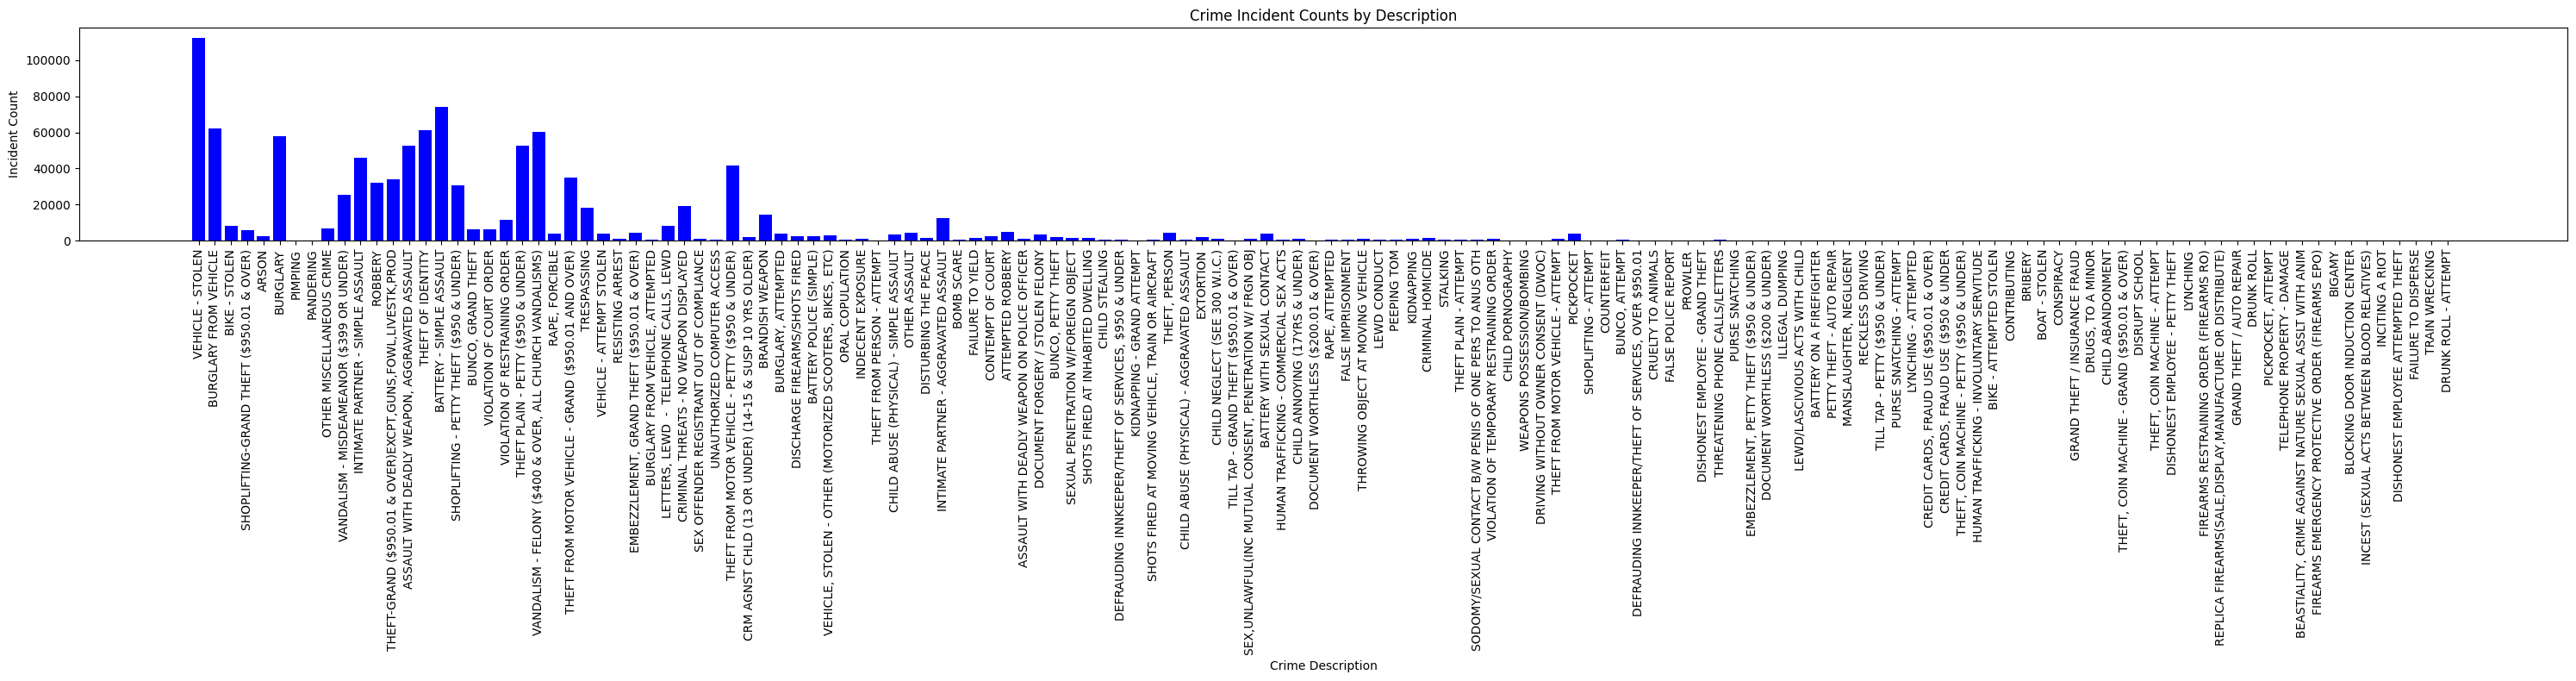

In [30]:
import matplotlib.pyplot as plt

# Plotting the incident count for each crime description
plt.figure(figsize=(30, 8))  # Adjust figure size as needed
plt.bar(Results_02['Crm_Cd_Desc'], Results_02['Incident_Count'], color='blue')

# Adding labels and title
plt.xlabel('Crime Description')
plt.ylabel('Incident Count')
plt.title('Crime Incident Counts by Description')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
Results_01=Results_01_raw 

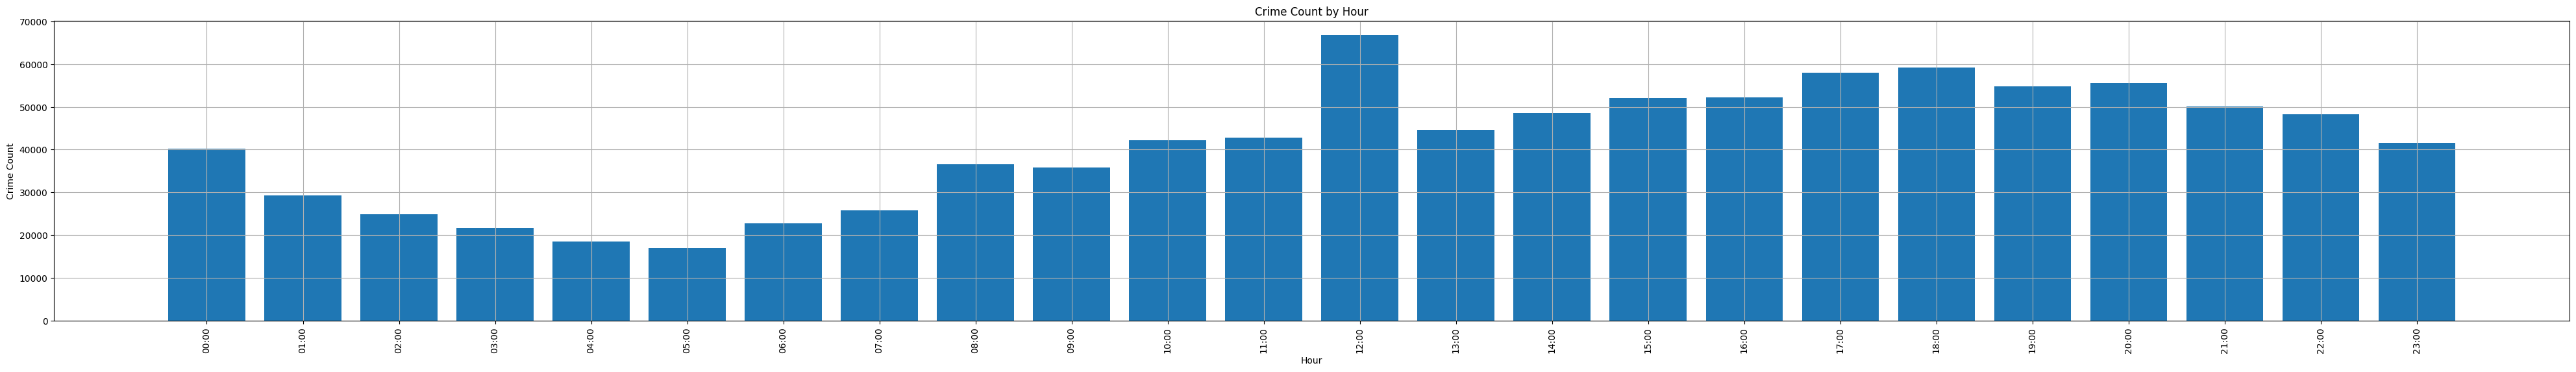

In [18]:
# Plotting
plt.figure(figsize=(50, 6))
#plt.plot(Results_01['TimeInterval'], Results_01['CrimeCount'][0:120], marker='o', linestyle='-')
plt.bar(Results_01['TimeInterval'], Results_01['CrimeCount'][0:120])
plt.title('Crime Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.xticks(rotation=90)  # Rotate for better readability
plt.grid(True)
plt.show()

In [32]:
Results_02

,Crm_Cd_Desc,Incident_Count,Location_CRM
0,VEHICLE - STOLEN,112350,"[(34.0375, -118.351), (34.082, -118.213), (34...."
1,BURGLARY FROM VEHICLE,62427,"[(34.0444, -118.263), (34.1774, -118.539), (34..."
2,BIKE - STOLEN,8063,"[(34.021, -118.3), (34.0303, -118.287), (34.04..."
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),5669,"[(34.1576, -118.439), (33.9874, -118.283), (34..."
4,ARSON,2460,"[(34.0536, -118.279), (33.9679, -118.274), (33..."
...,...,...,...
135,INCITING A RIOT,22,"[(34.1016, -118.327), (33.9493, -118.396), (33..."
136,DISHONEST EMPLOYEE ATTEMPTED THEFT,4,"[(34.1608, -118.51), (34.1794, -118.396), (34...."
137,FAILURE TO DISPERSE,4,"[(34.0566, -118.257), (34.0477, -118.25), (34...."
138,TRAIN WRECKING,1,"[(33.7798, -118.241)]"
